In [1]:
import numpy as np
import math as math
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
df=pd.read_csv('innings_deliveries.csv')
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


In [3]:
df.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]


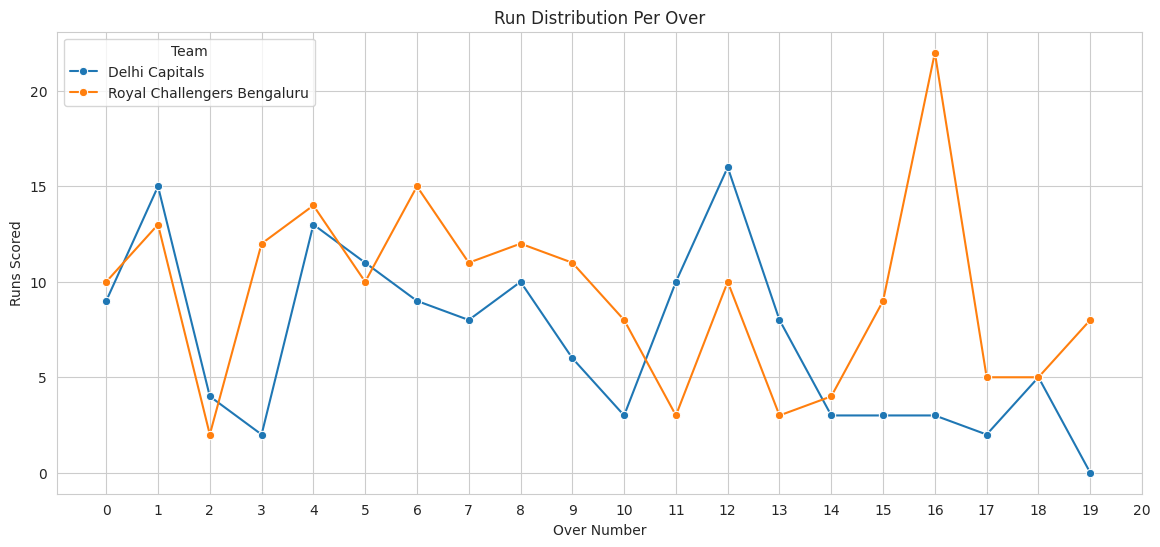

In [6]:
sns.set_style("whitegrid")
runs = df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=runs, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21)) 
plt.legend(title='Team')
plt.show()

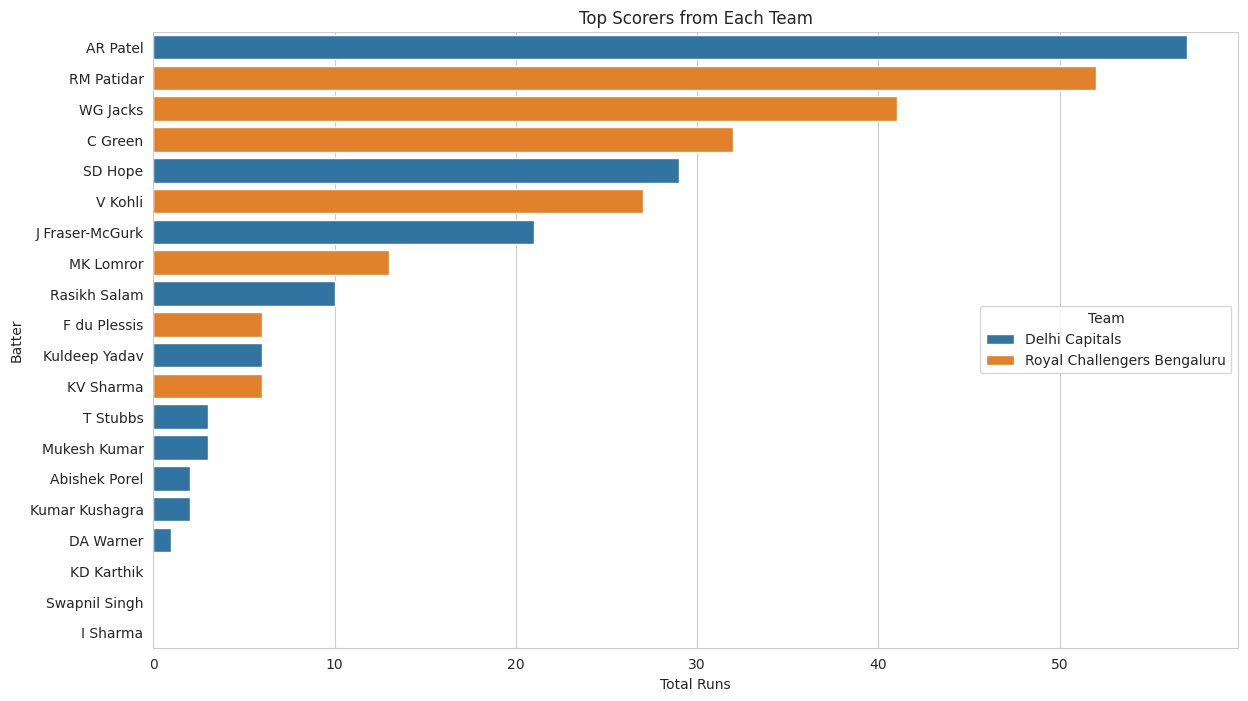

In [5]:
top_scorers = df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

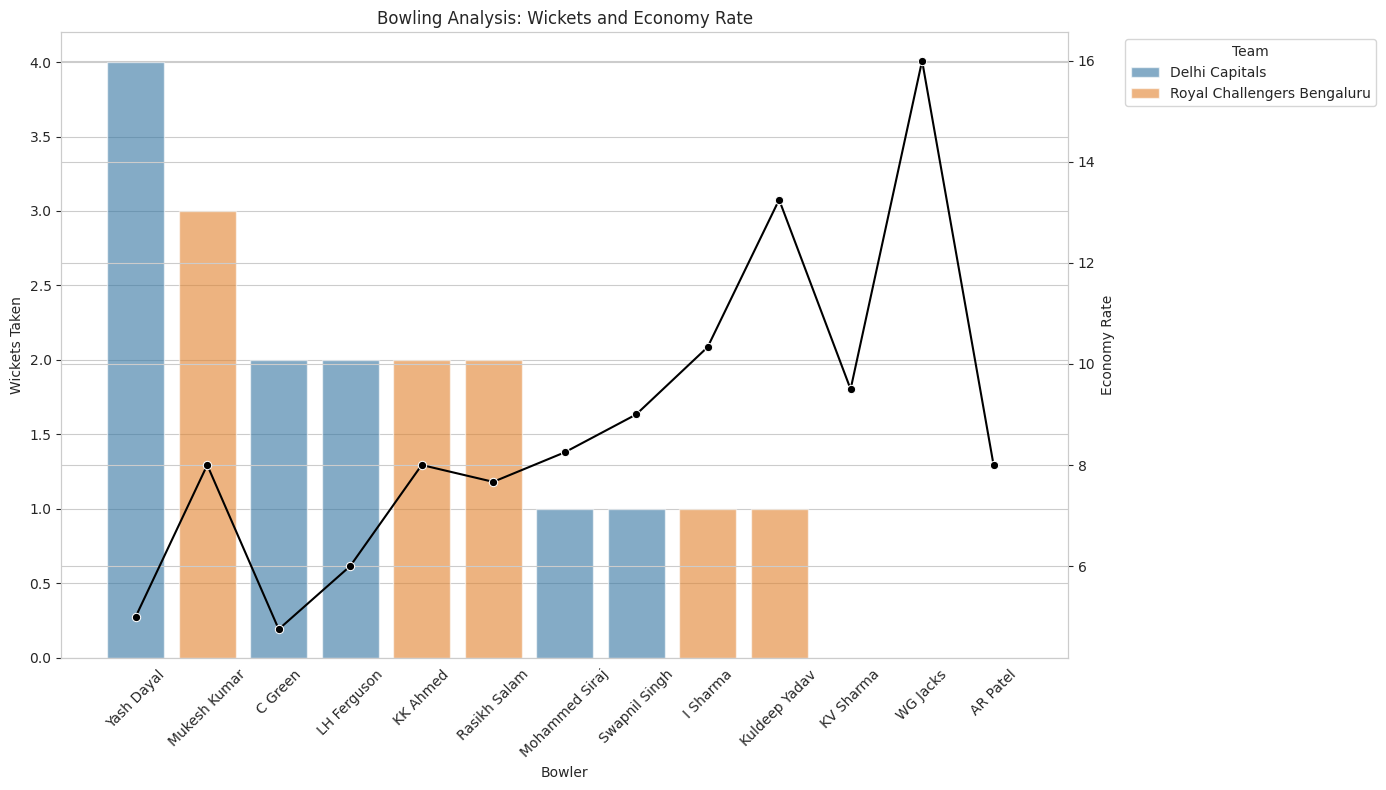

In [11]:
df['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling['economy_rate'] = bowling['runs_total'] / bowling['over']
bowling_sorted = bowling.sort_values(by='wickets_taken', ascending=False)
bowling_sorted['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling['economy_rate'] = bowling['runs_total'] /bowling['over']
bowling_sorted = bowling.sort_values(by='wickets_taken', ascending=False)
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(data=bowling_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

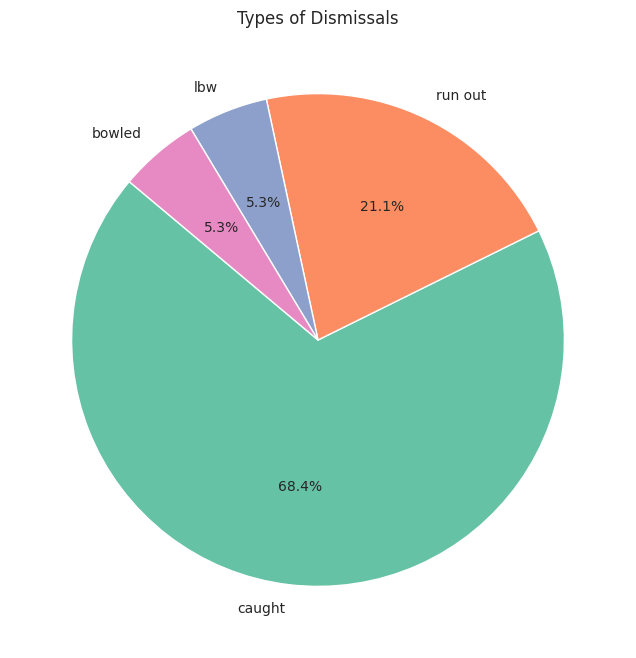

In [12]:
dismissal_types = df['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

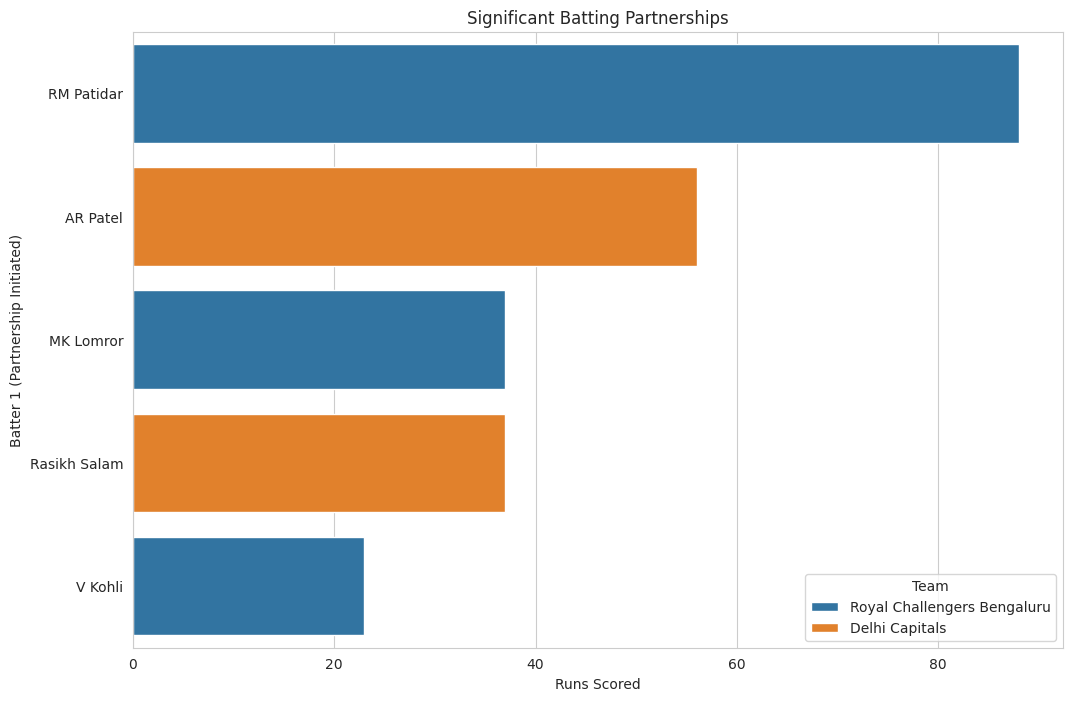

In [14]:
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships
partnerships_data = calculate_partnerships(df)
partnerships_df = pd.DataFrame(partnerships_data)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

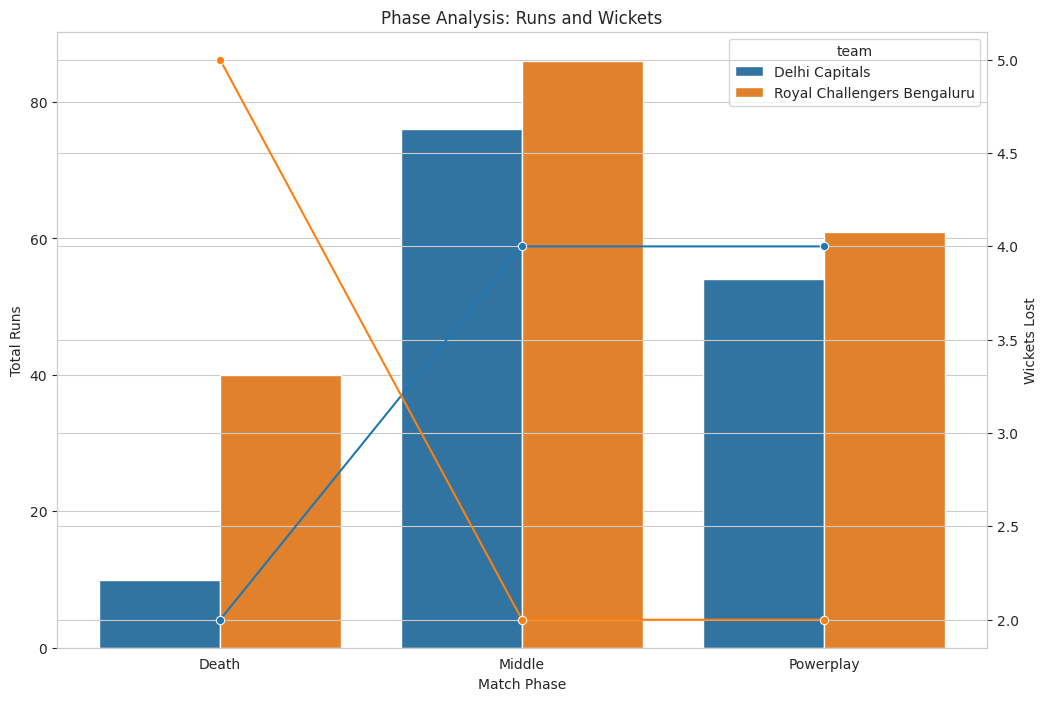

In [15]:
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

df['phase'] = df['over'].apply(classify_phase)
phase_analysis = df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

In [16]:
batter_stats = df.groupby('batter').agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()
batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


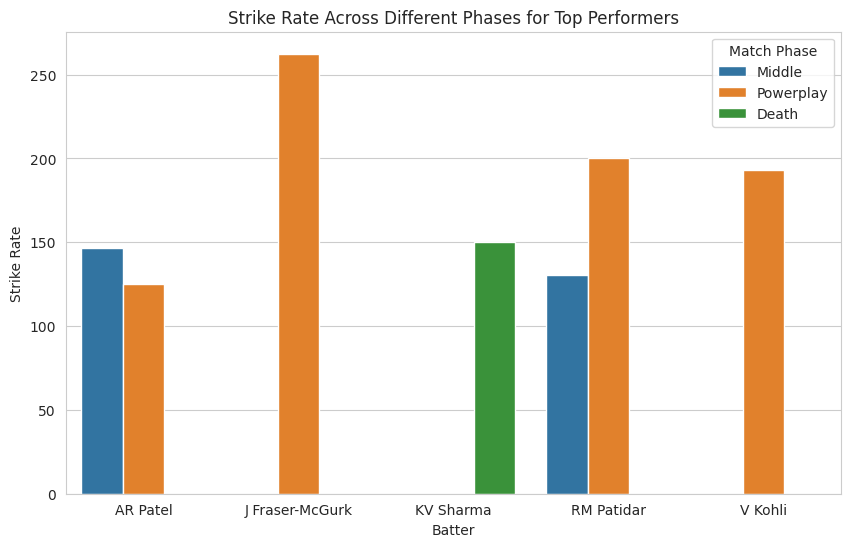

In [17]:
batter_phase_stats = df.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()

<ipython-input-19-293dadf03b03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
<ipython-input-19-293dadf03b03>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6


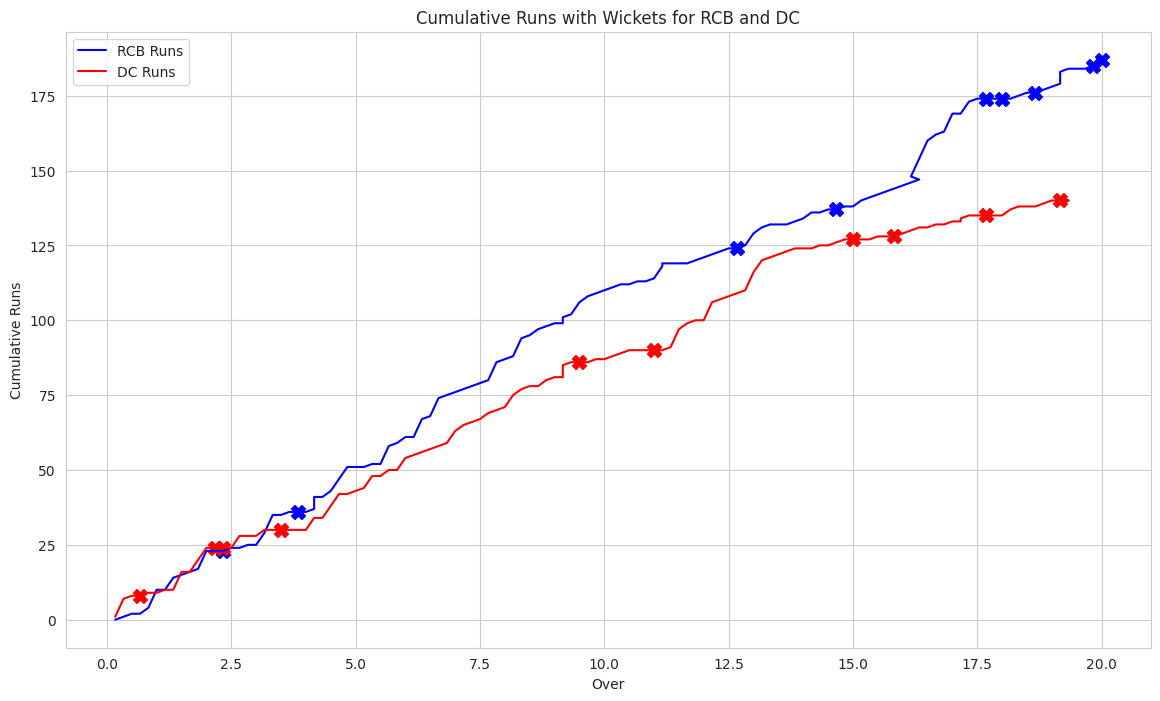

In [19]:
df['cumulative_runs'] = df.groupby('team')['runs_total'].cumsum()
df['cumulative_wickets'] =df.groupby('team')['wickets_taken'].cumsum()
rcb_deliveries = df[df['team'] == 'Royal Challengers Bengaluru']
dc_deliveries = df[df['team'] == 'Delhi Capitals']
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

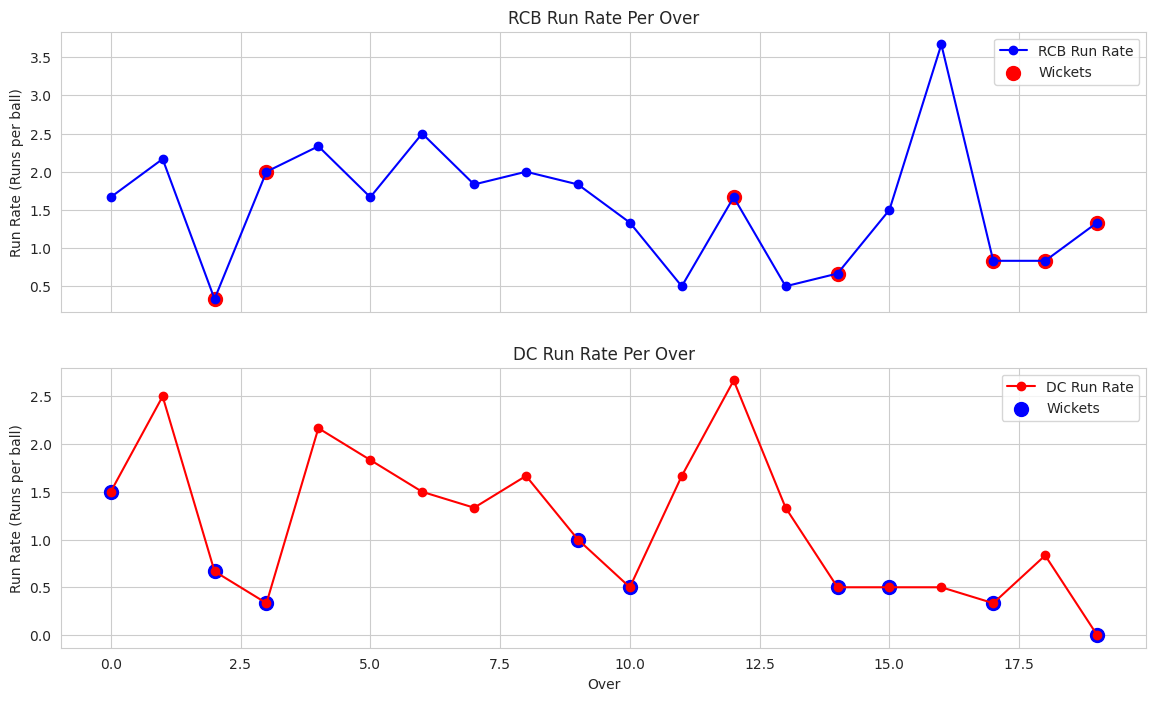

In [20]:
per_over_stats = df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()
# calculate run rate for each over
per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6)    
rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
# RCB
ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='blue', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['over'], rcb_per_over_stats[rcb_per_over_stats['wickets_taken'] > 0]['run_rate'], color='red', s=100, label='Wickets')
ax1.set_title('RCB Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()
# DC
ax2.plot(dc_per_over_stats['over'], dc_per_over_stats['run_rate'], marker='o', color='red', label='DC Run Rate')
ax2.scatter(dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['over'], dc_per_over_stats[dc_per_over_stats['wickets_taken'] > 0]['run_rate'], color='blue', s=100, label='Wickets')
ax2.set_title('DC Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()

plt.show()